In [ ]:
#https://www.kaggle.com/gpreda/covid-world-vaccination-progress

In [327]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize']=(15,12)
pd.set_option('display.max_rows', None)
from scipy import stats


In [328]:
daily = pd.read_csv('worldometer_coronavirus_daily_data.csv')
summary = pd.read_csv('worldometer_coronavirus_summary_data.csv')
vac_by_cty = pd.read_csv('country_vaccinations.csv')

In [450]:
# create an additional column 'pct_death'

summary['pct_death'] = summary['total_deaths']/summary['population']
summary['pct_rec'] = summary['total_recovered']/summary['population']
summary['pct_confirmed'] = summary['total_confirmed']/summary['population']
summary['pct_tests'] = summary['total_tests']/summary['population']
summary.head()

,country_1,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,pct_death,pct_rec,pct_confirmed,pct_tests
0,Afghanistan,Asia,88888,3460.0,60598.0,24830.0,1124.0,2236,87.0,520008.0,13081.0,39751424,0.000087,0.001524,0.002236,0.013081
1,Albania,Europe,132437,2453.0,129807.0,177.0,18.0,46068,853.0,752527.0,261764.0,2874828,0.000853,0.045153,0.046068,0.261764
2,Algeria,Africa,132727,3560.0,92384.0,36783.0,25.0,2976,80.0,230861.0,5177.0,44595470,0.000080,0.002072,0.002976,0.005177
3,Andorra,Europe,13813,127.0,13591.0,95.0,3.0,178504,1641.0,193595.0,2501809.0,77382,0.001641,0.175635,0.178504,2.501809
4,Angola,Africa,36455,819.0,30101.0,5535.0,9.0,1078,24.0,596451.0,17634.0,33823498,0.000024,0.000890,0.001078,0.017634


In [330]:
# create an additional column 'pct_vac'

vac_by_cty['pct_vac'] = vac_by_cty['people_fully_vaccinated_per_hundred']/100


vac_by_cty.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,pct_vac
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN


In [331]:
# captitalise every first letter in vac_by_cty_list_cty_names

vac_by_cty['country'] = [cap.title() for cap in vac_by_cty['country']]

In [332]:
# rename USA and UK to align with summary

vac_by_cty.replace({'United States':'USA','United Kingdom':'UK'}, inplace=True)
vac_by_cty_list_cty_names =vac_by_cty.country.unique().tolist()
summary_list_cty_names = summary.country.unique().tolist()

In [333]:
# find unique country of these 2 sets of data

unique_cty = list(set(vac_by_cty_list_cty_names)-(set(summary_list_cty_names)))
unique_cty

['Tonga',
 'Guinea-Bissau',
 'Cook Islands',
 'Czechia',
 'Pitcairn',
 'Palestine',
 'England',
 'Bonaire Sint Eustatius And Saba',
 'Northern Cyprus',
 'Hong Kong',
 'North Macedonia',
 'Jersey',
 'Turkmenistan',
 'Wallis And Futuna',
 'Macao',
 'Democratic Republic Of Congo',
 'Kosovo',
 'Guernsey',
 'Tuvalu',
 'Falkland Islands',
 'Cape Verde',
 'Timor',
 'Scotland',
 'Wales',
 'Northern Ireland',
 'Eswatini',
 'Brunei',
 "Cote D'Ivoire",
 'Vietnam',
 'Sint Maarten (Dutch Part)',
 'Nauru']

In [334]:
#remove countries in the unique_cty list for vac_by_cty
add=[]
for i in unique_cty:
    x = vac_by_cty[vac_by_cty.country==i]
    add.append(x)
add = pd.concat(add)

add_idx=[]
for y in add.index:
    add_idx.append(y)
    

In [335]:
# remove these countries for vac_by_cty

vac_by_cty.drop(index= add_idx, inplace=True)

In [336]:
vac_by_cty_list_cty_names =vac_by_cty.country.unique().tolist()
summary_list_cty_names = summary.country.unique().tolist()

In [337]:
# find unique country of these 2 sets of data vice versa

unique_cty_a = list(set(summary_list_cty_names)-(set(vac_by_cty_list_cty_names)))
unique_cty_a

['Saint Barthelemy',
 'Guadeloupe',
 'Brunei Darussalam',
 'Sint Maarten',
 'Wallis And Futuna Islands',
 'Burundi',
 'Swaziland',
 'State Of Palestine',
 'Reunion',
 'Saint Pierre And Miquelon',
 'Cote D Ivoire',
 'Tanzania',
 'Haiti',
 'Czech Republic',
 'Cabo Verde',
 'Micronesia',
 'Channel Islands',
 'Holy See',
 'Falkland Islands Malvinas',
 'Western Sahara',
 'Caribbean Netherlands',
 'Democratic Republic Of The Congo',
 'China Hong Kong Sar',
 'Guinea Bissau',
 'Macedonia',
 'Mayotte',
 'Saint Martin',
 'Timor Leste',
 'French Guiana',
 'Marshall Islands',
 'China Macao Sar',
 'Viet Nam',
 'Martinique',
 'Eritrea']

In [338]:
#remove countries in the unique_cty list for summary

add=[]
for i in unique_cty_a:
    x = summary[summary.country==i]
    add.append(x)
add = pd.concat(add)

add_idx=[]
for y in add.index:
    add_idx.append(y)

In [339]:
# remove these countries for vac_by_cty

summary.drop(index= add_idx, inplace=True)

In [340]:
vac_by_cty_list_cty_names =vac_by_cty.country.unique().tolist()
summary_list_cty_names = summary.country.unique().tolist()

In [341]:
# check for uniqueness

summary.country.describe()

count           186
unique          186
top       Indonesia
freq              1
Name: country, dtype: object

In [342]:
# check for uniqueness

vac_by_cty.country.describe()

count      23912
unique       186
top       Norway
freq         204
Name: country, dtype: object

In [343]:
vac_by_cty.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,pct_vac
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN


In [344]:
# replace nan with zero

vac_by_cty.replace({np.nan:0}, inplace=True)

In [345]:
# replace nan with zero

summary.replace({np.nan:0}, inplace=True)

In [346]:
# rename summary.country to summary.country_1

summary.rename(columns={'country':'country_1'}, inplace=True)

In [347]:
pct_vac = vac_by_cty.groupby('country')['pct_vac'].agg(np.sum).reset_index()

In [348]:
#reset index for summary

summary.reset_index(drop=True, inplace=True)

In [349]:
summary.head(2)

,country_1,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,pct_death,pct_rec,pct_confirmed,pct_tests
0,Afghanistan,Asia,88888,3460.0,60598.0,24830.0,1124.0,2236,87.0,520008.0,13081.0,39751424,0.000087,0.001524,0.002236,0.013081
1,Albania,Europe,132437,2453.0,129807.0,177.0,18.0,46068,853.0,752527.0,261764.0,2874828,0.000853,0.045153,0.046068,0.261764


In [378]:
# compute a new dataframe consisting only of country and pct_death and continent

pct_death = summary.loc[:, ['country_1','continent','pct_tests','pct_confirmed','pct_rec','pct_death','total_deaths']]

In [379]:
pct_death.shape, pct_vac.shape

((186, 7), (186, 2))

In [380]:
# concatenate the 2 dataframes 

pct_death_vac = pd.concat([pct_vac,pct_death], axis=1)

In [381]:
pct_death_vac.head()

,country,pct_vac,country_1,continent,pct_tests,pct_confirmed,pct_rec,pct_death,total_deaths
0,Afghanistan,0.0357,Afghanistan,Asia,0.013081,0.002236,0.001524,0.000087,3460.0
1,Albania,3.4607,Albania,Europe,0.261764,0.046068,0.045153,0.000853,2453.0
2,Algeria,0.0000,Algeria,Africa,0.005177,0.002976,0.002072,0.000080,3560.0
3,Andorra,1.1898,Andorra,Europe,2.501809,0.178504,0.175635,0.001641,127.0
4,Angola,0.0919,Angola,Africa,0.017634,0.001078,0.000890,0.000024,819.0


In [382]:
# drop country_1

del pct_death_vac['country_1']

In [383]:
pct_death_vac.head()

,country,pct_vac,continent,pct_tests,pct_confirmed,pct_rec,pct_death,total_deaths
0,Afghanistan,0.0357,Asia,0.013081,0.002236,0.001524,0.000087,3460.0
1,Albania,3.4607,Europe,0.261764,0.046068,0.045153,0.000853,2453.0
2,Algeria,0.0000,Africa,0.005177,0.002976,0.002072,0.000080,3560.0
3,Andorra,1.1898,Europe,2.501809,0.178504,0.175635,0.001641,127.0
4,Angola,0.0919,Africa,0.017634,0.001078,0.000890,0.000024,819.0


In [384]:
# reorder columns

pct_death_vac=pct_death_vac[['country','continent','pct_tests','pct_vac','pct_confirmed','pct_rec','pct_death','total_deaths']]

In [385]:
pct_death_vac.head()

,country,continent,pct_tests,pct_vac,pct_confirmed,pct_rec,pct_death,total_deaths
0,Afghanistan,Asia,0.013081,0.0357,0.002236,0.001524,0.000087,3460.0
1,Albania,Europe,0.261764,3.4607,0.046068,0.045153,0.000853,2453.0
2,Algeria,Africa,0.005177,0.0000,0.002976,0.002072,0.000080,3560.0
3,Andorra,Europe,2.501809,1.1898,0.178504,0.175635,0.001641,127.0
4,Angola,Africa,0.017634,0.0919,0.001078,0.000890,0.000024,819.0


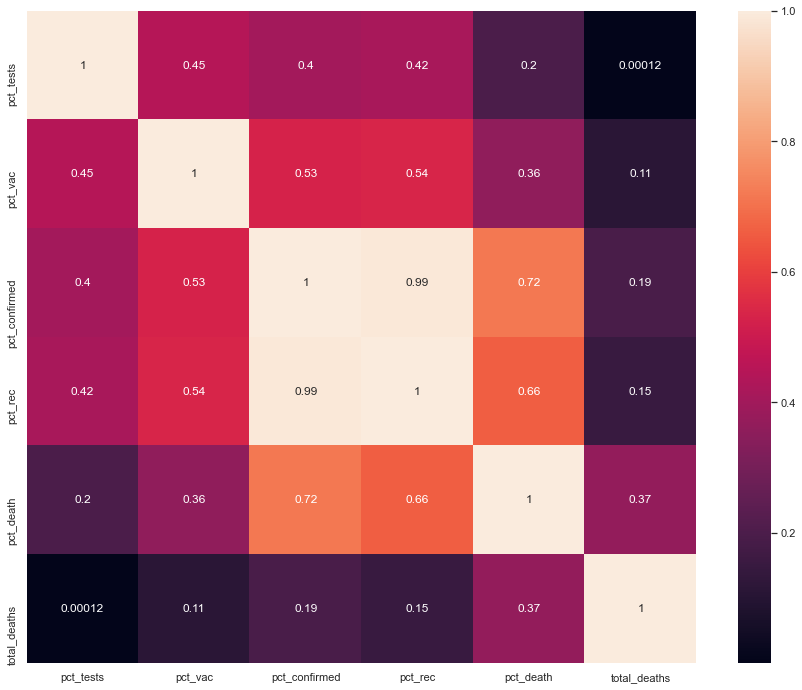

In [386]:
# compute correlation heatmap

sns.heatmap(pct_death_vac.corr(),annot=True);

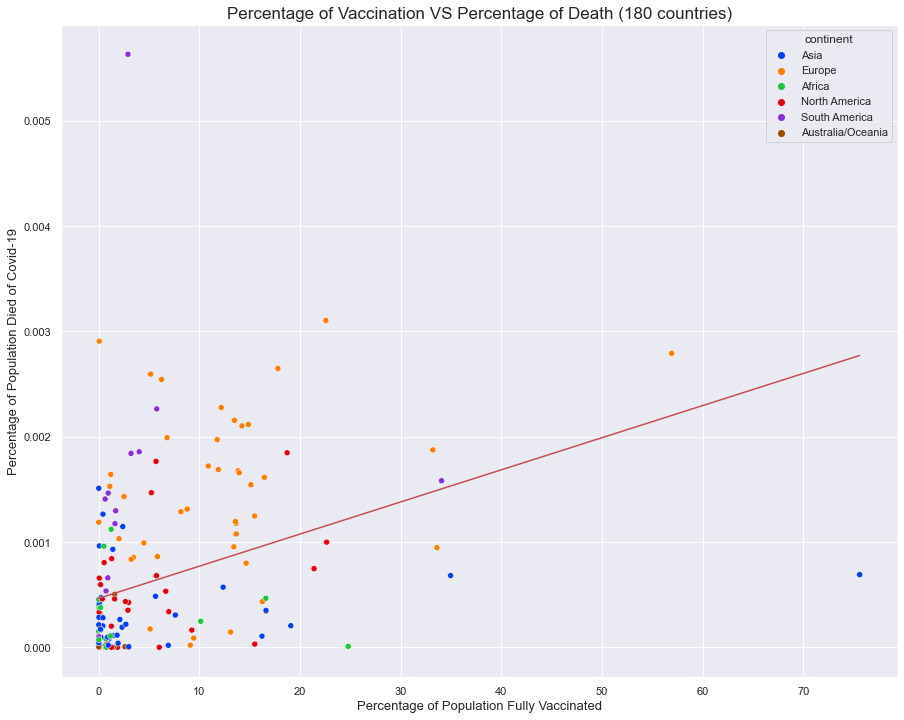

In [387]:
# plot a chart to show relationship between vaccination and death

sns.scatterplot(data=pct_death_vac, x='pct_vac', y='pct_death', hue='continent', palette='bright');
plt.xlabel('Percentage of Population Fully Vaccinated', fontsize=13);
plt.ylabel('Percentage of Population Died of Covid-19', fontsize=13);
plt.title('Percentage of Vaccination VS Percentage of Death (180 countries)', fontsize=17);

# plot a regression line

x = np.array([pct_death_vac.pct_vac]).flatten()
y = np.array([pct_death_vac.pct_death]).flatten()
m, b, r, p, stderr = stats.linregress(x,y)

func = lambda x: m*x + b

x1 = np.array([0, 75.5908 ])
y1 = np.array([func(0), func(75.5908)])
plt.plot(x1,y1, c='r');

In [388]:
x2.max()

75.5908

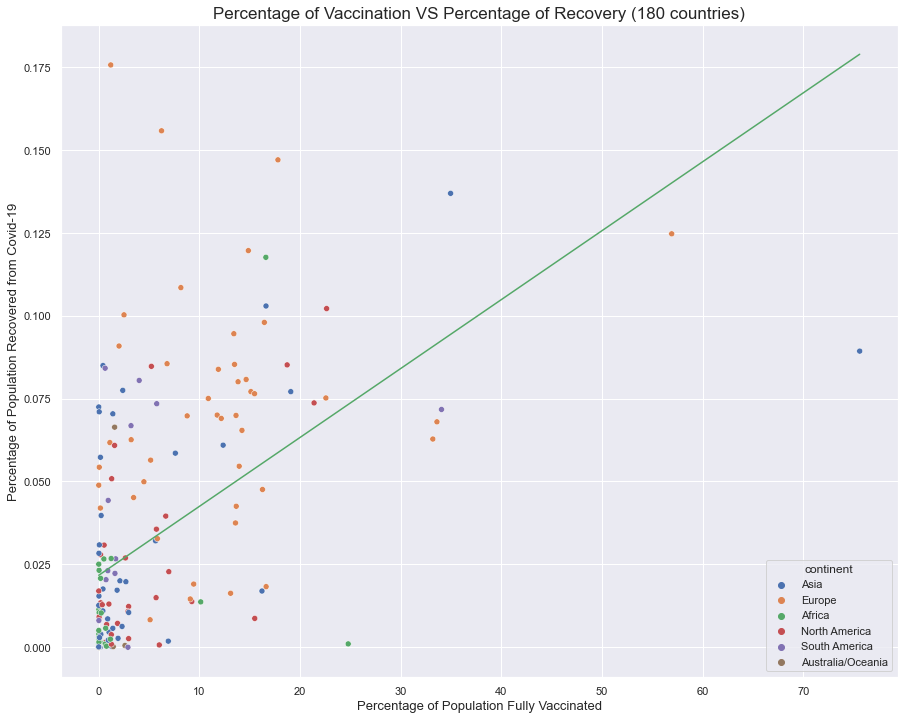

In [389]:
# plot a chart to show relationship between vaccination and recovery

sns.scatterplot(data=pct_death_vac, x='pct_vac', y='pct_rec',hue='continent',palette='deep');
plt.xlabel('Percentage of Population Fully Vaccinated', fontsize=13);
plt.ylabel('Percentage of Population Recovered from Covid-19', fontsize=13);
plt.title('Percentage of Vaccination VS Percentage of Recovery (180 countries)', fontsize=17);

# plot a regression line
x2 = np.array([pct_death_vac.pct_vac]).flatten()
y2 = np.array([pct_death_vac.pct_rec]).flatten()

m , b, r, p, stderr = stats.linregress(x2,y2)

func = lambda x: m*x + b

x3 = np.array([0,75.5908])
y3 = np.array([func(0), func(75.5908)])

plt.plot(x3, y3, c='g');

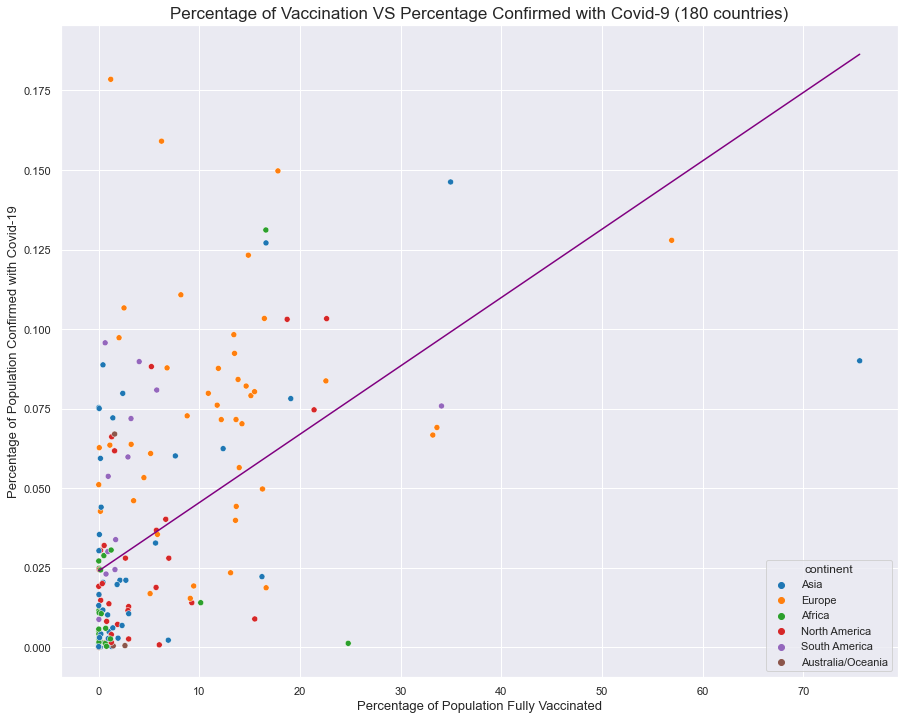

In [390]:
# plot a chart to show relationship between vaccination and total confirmed

sns.scatterplot(data=pct_death_vac, x='pct_vac', y='pct_confirmed',hue='continent',palette='tab10');
plt.xlabel('Percentage of Population Fully Vaccinated', fontsize=13);
plt.ylabel('Percentage of Population Confirmed with Covid-19', fontsize=13);
plt.title('Percentage of Vaccination VS Percentage Confirmed with Covid-9 (180 countries)', fontsize=17);

# plot a regression line

x4 = np.array([pct_death_vac.pct_vac]).flatten()
y4 = np.array([pct_death_vac.pct_confirmed]).flatten()

m , b, r, p, stderr = stats.linregress(x4,y4)

func = lambda x: m*x + b

x5 = np.array([0,75.5908])
y5 = np.array([func(0), func(75.5908)])

plt.plot(x5, y5, c='purple');

In [426]:
pct_death_vac.pct_tests.max()

10.581009991299943

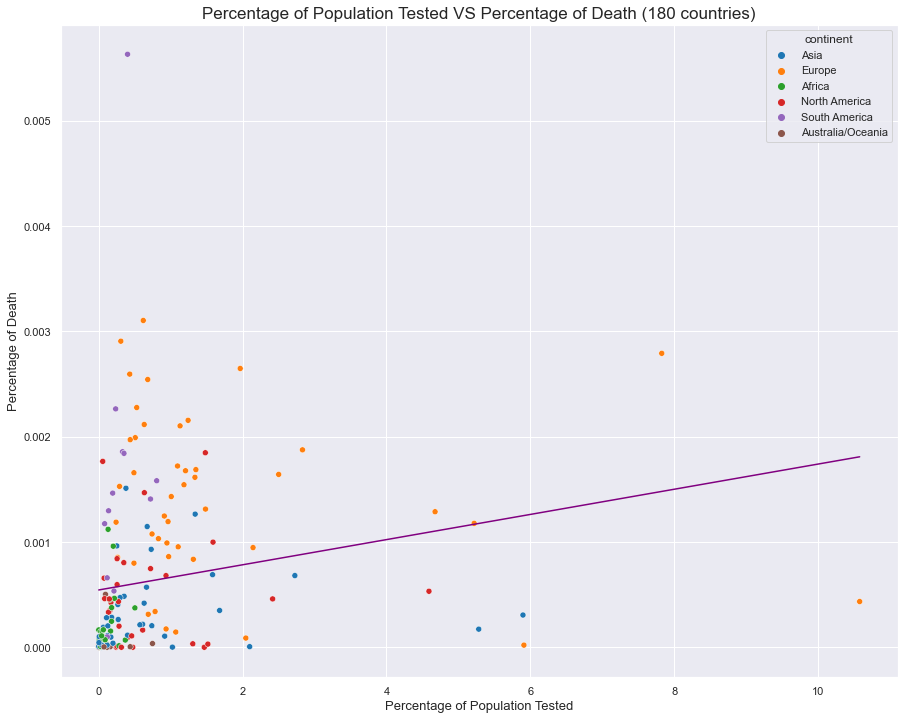

In [427]:
# plot a chart to show relationship between vaccination and total confirmed

sns.scatterplot(data=pct_death_vac, x='pct_tests', y='pct_death',hue='continent',palette='tab10');
plt.xlabel('Percentage of Population Tested', fontsize=13);
plt.ylabel('Percentage of Death', fontsize=13);
plt.title('Percentage of Population Tested VS Percentage of Death (180 countries)', fontsize=17);

# plot a regression line

x4 = np.array([pct_death_vac.pct_tests]).flatten()
y4 = np.array([pct_death_vac.pct_death]).flatten()

m , b, r, p, stderr = stats.linregress(x4,y4)

func = lambda x: m*x + b

x5 = np.array([0,10.581])
y5 = np.array([func(0), func(10.581)])

plt.plot(x5, y5, c='purple');

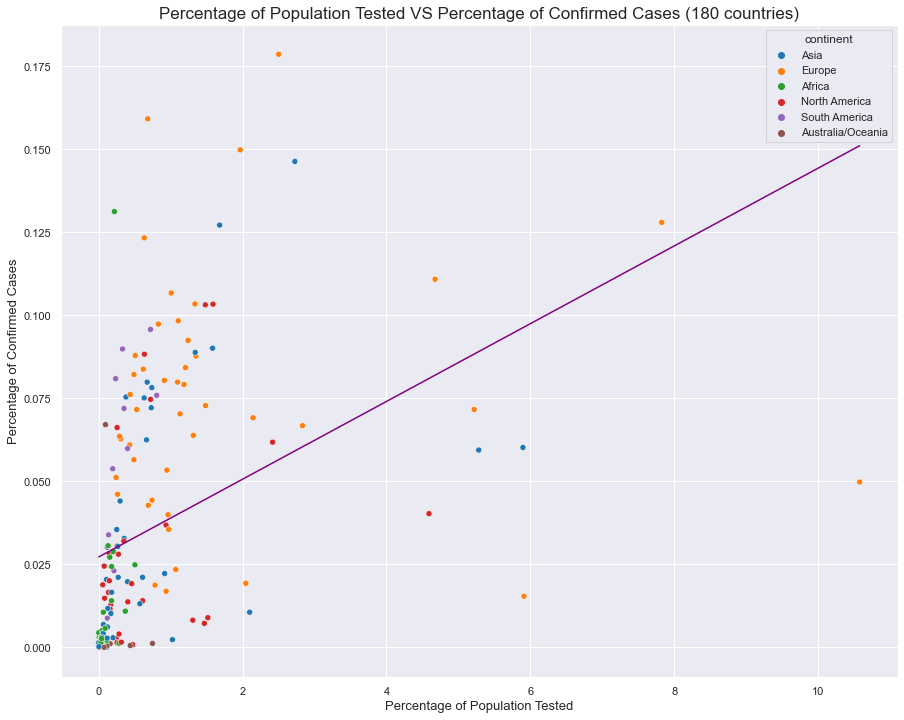

In [451]:
# plot a chart to show relationship between tests and total confirmed

sns.scatterplot(data=pct_death_vac, x='pct_tests', y='pct_confirmed',hue='continent',palette='tab10');
plt.xlabel('Percentage of Population Tested', fontsize=13);
plt.ylabel('Percentage of Confirmed Cases', fontsize=13);
plt.title('Percentage of Population Tested VS Percentage of Confirmed Cases (180 countries)', fontsize=17);

# plot a regression line

x4 = np.array([pct_death_vac.pct_tests]).flatten()
y4 = np.array([pct_death_vac.pct_confirmed]).flatten()

m , b, r, p, stderr = stats.linregress(x4,y4)

func = lambda x: m*x + b

x5 = np.array([0,10.581])
y5 = np.array([func(0), func(10.581)])

plt.plot(x5, y5, c='purple');

In [391]:
# import KMeans 

from sklearn.cluster import KMeans

In [392]:
pct_death_vac.head(2)

,country,continent,pct_tests,pct_vac,pct_confirmed,pct_rec,pct_death,total_deaths
0,Afghanistan,Asia,0.013081,0.0357,0.002236,0.001524,0.000087,3460.0
1,Albania,Europe,0.261764,3.4607,0.046068,0.045153,0.000853,2453.0


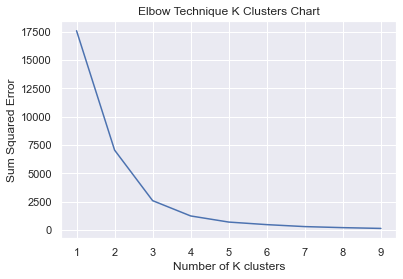

In [393]:
# cluster vaccination vs death

vac_death = pct_death_vac.loc[:,['pct_vac','pct_death']]

fig=plt.gcf();
fig.set_size_inches(6,4);
sse=[]
k = range(1,10)
for i in k: 
    km = KMeans(n_clusters=i, random_state=1).fit(vac_death)
    sse.append(km.inertia_)

plt.plot(k,sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum Squared Error');
plt.title('Elbow Technique K Clusters Chart');
    

In [394]:
# clustering using k =3

vac_death['clusters'] = KMeans(n_clusters=3, random_state=1).fit_predict(vac_death)

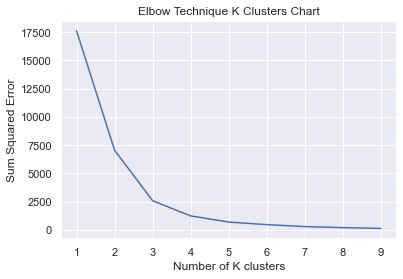

In [395]:
# cluster vaccination vs recovery

vac_rec = pct_death_vac.loc[:,['pct_vac','pct_rec']]

fig=plt.gcf();
fig.set_size_inches(6,4);
sse=[]
k = range(1,10)
for i in k: 
    km = KMeans(n_clusters=i, random_state=1).fit(vac_death)
    sse.append(km.inertia_)

plt.plot(k,sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum Squared Error');
plt.title('Elbow Technique K Clusters Chart');

In [396]:
# clustering using k =3

vac_rec['clusters'] = KMeans(n_clusters=3, random_state=1).fit_predict(vac_rec)

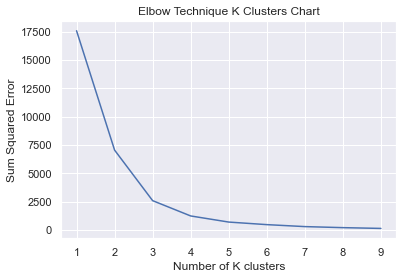

In [429]:
# cluster vaccination vs confirmed

vac_confirmed = pct_death_vac.loc[:,['pct_vac','pct_confirmed']]

fig=plt.gcf();
fig.set_size_inches(6,4);
sse=[]
k = range(1,10)
for i in k: 
    km = KMeans(n_clusters=i, random_state=1).fit(vac_confirmed)
    sse.append(km.inertia_)

plt.plot(k,sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum Squared Error');
plt.title('Elbow Technique K Clusters Chart');

In [430]:
# clustering using k =3

vac_confirmed['clusters'] = KMeans(n_clusters=3, random_state=1).fit_predict(vac_confirmed)

In [431]:
vac_death.head(2)

,pct_vac,pct_death,clusters
0,0.0357,0.000087,0
1,3.4607,0.000853,0


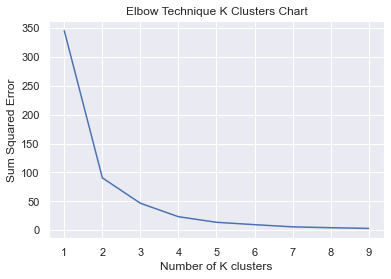

In [433]:
# cluster tests vs death

tests_death = pct_death_vac.loc[:,['pct_death','pct_tests']]

fig=plt.gcf();
fig.set_size_inches(6,4);
sse=[]
k = range(1,10)
for i in k: 
    km = KMeans(n_clusters=i, random_state=1).fit(tests_death)
    sse.append(km.inertia_)

plt.plot(k,sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum Squared Error');
plt.title('Elbow Technique K Clusters Chart');

In [434]:
# clustering using k =3

tests_death['clusters'] = KMeans(n_clusters=3, random_state=1).fit_predict(tests_death)

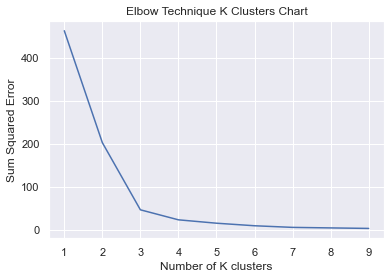

In [452]:
# cluster tests vs confirmed cases

tests_confirmed = pct_death_vac.loc[:,['pct_confirmed','pct_tests']]

fig=plt.gcf();
fig.set_size_inches(6,4);
sse=[]
k = range(1,10)
for i in k: 
    km = KMeans(n_clusters=i, random_state=1).fit(tests_death)
    sse.append(km.inertia_)

plt.plot(k,sse);
plt.xlabel('Number of K clusters');
plt.ylabel('Sum Squared Error');
plt.title('Elbow Technique K Clusters Chart');

In [453]:
# clustering using k =3

tests_confirmed['clusters'] = KMeans(n_clusters=3, random_state=1).fit_predict(tests_confirmed)

## Chart out the vaccination vs death rates in 3 clusters

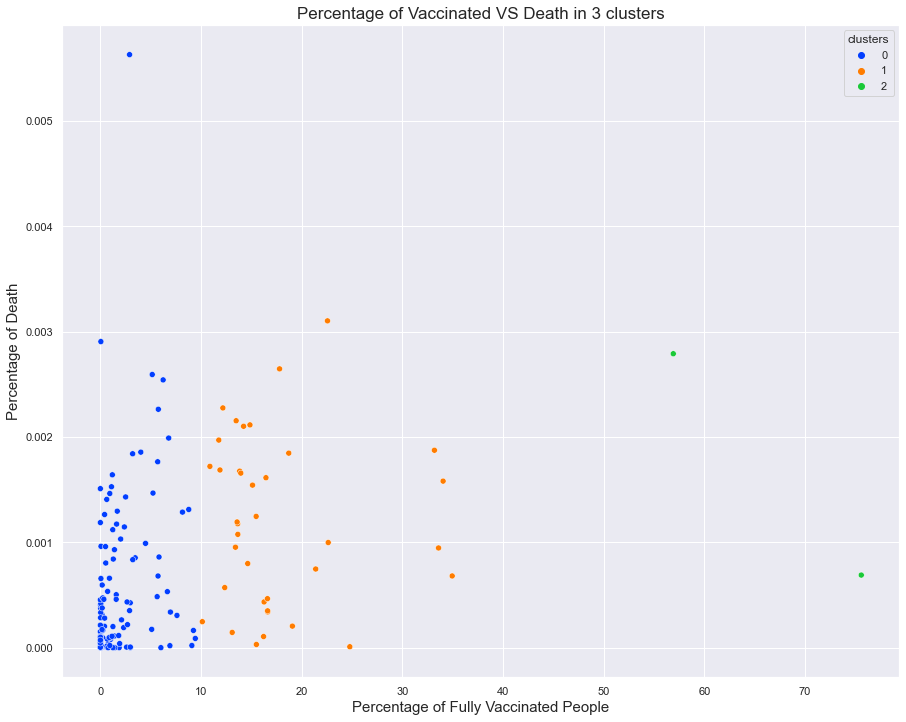

In [400]:
# chart out the clusters for vaccination vs death

sns.scatterplot(data=vac_death, x='pct_vac', y='pct_death', hue='clusters', palette='bright');
plt.xlabel('Percentage of Fully Vaccinated People', fontsize=15);
plt.ylabel('Percentage of Death', fontsize=15);
plt.title('Percentage of Vaccinated VS Death in 3 clusters', fontsize=17);

In [401]:
# import F statistics for anova

from scipy.stats import f_oneway

## Hypothesis testing No.1

### Null Hypotheses, there is no difference between the 3 clusters on vaccination impact on death rates. 
### Alternative Hypothese: there is a significant difference between the 3 clusters on death rates


In [446]:
# categorize death rates according to the 3 clusters

vac_death_grp0 = vac_death.loc[vac_death.clusters==0,'pct_death']
vac_death_grp1 = vac_death.loc[vac_death.clusters==1,'pct_death']
vac_death_grp2 = vac_death.loc[vac_death.clusters==2,'pct_death']

In [403]:
# compute f statistics with anova for variance across 3 clusters

f_oneway(vac_death_grp0,vac_death_grp1,vac_death_grp2)

F_onewayResult(statistic=15.377389222805231, pvalue=6.713918660112699e-07)

### For F statistics:
### since p_value < 0.05, we reject null hypothesis
### The verdict :  There is a significant difference between the 3 clusters on death rates

In [404]:
print(f" The average death rate for the least vaccinated countries is {round(vac_death_grp0.mean()*100,2)}%")
print(f" The average death rate for the 2nd most vaccinated countries is {round(vac_death_grp1.mean()*100,2)}%")
print(f" The average death rate for the most vaccinated countries is  {round(vac_death_grp2.mean()*100,2)}%")

 The average death rate for the least vaccinated countries is 0.05%
 The average death rate for the 2nd most vaccinated countries is 0.12%
 The average death rate for the most vaccinated countries is  0.17%


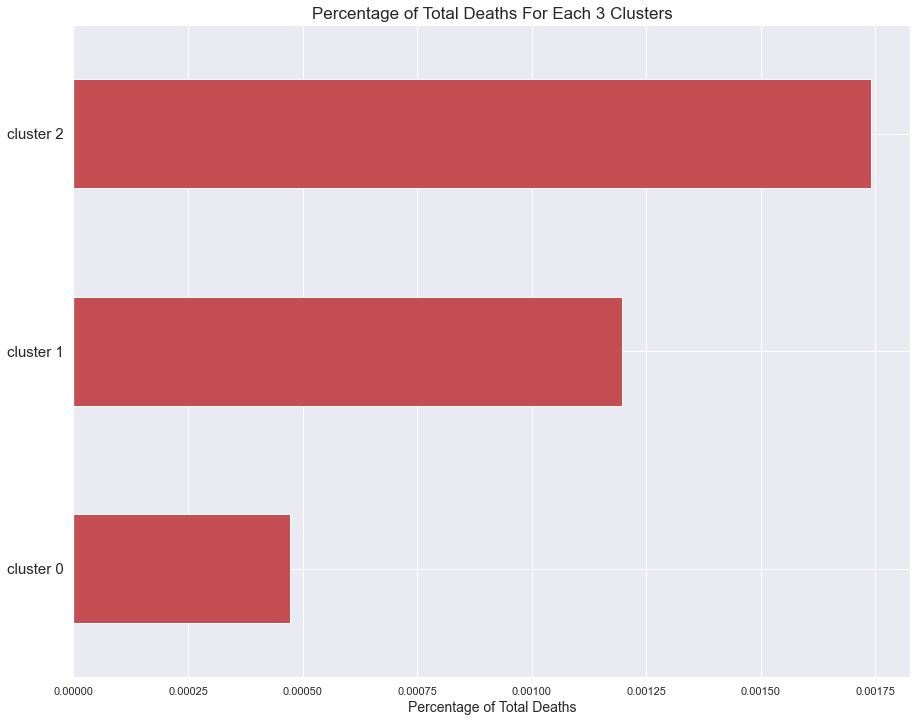

In [405]:
# plot a bar char to show percentage of total deaths for each 3 clusters

vac_death.groupby('clusters')['pct_death'].mean().plot(kind='barh',color='r');
plt.ylabel('', fontsize=14);
plt.xlabel('Percentage of Total Deaths', fontsize=14);
x = ['cluster 0','cluster 1','cluster 2']
x_pos = [i for i,  _ in enumerate(x)]
plt.yticks(x_pos, x, fontsize=15)
plt.title('Percentage of Total Deaths For Each 3 Clusters', fontsize=17);


## Chart out the vaccination vs recovery rates in 3 clusters

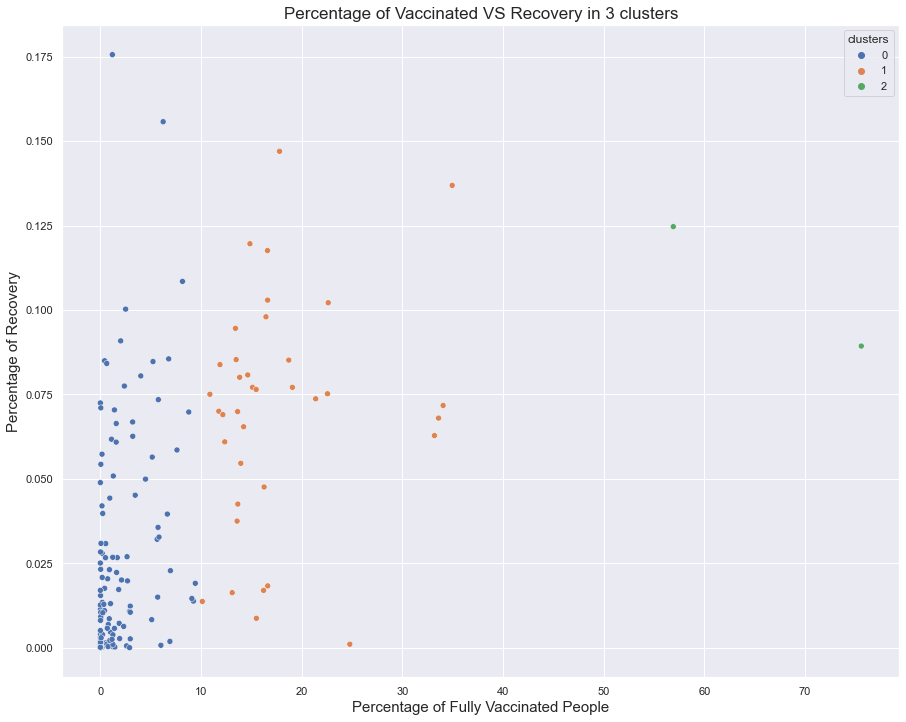

In [406]:
# chart out the clusters for vaccination vs recovery

sns.scatterplot(data=vac_rec, x='pct_vac', y='pct_rec', hue='clusters', palette='deep');
plt.xlabel('Percentage of Fully Vaccinated People', fontsize=15);
plt.ylabel('Percentage of Recovery', fontsize=15);
plt.title('Percentage of Vaccinated VS Recovery in 3 clusters', fontsize=17);


## Hypothesis testing No.2

### Null Hypotheses, there is no difference between the 3 clusters on vaccination impact on recovery rates. 
### Alternative Hypothese: there is a significant difference between the 3 clusters on vaccination impact on recovery rates


In [407]:
# categorize recovery rates according to the 3 clusters

vac_rec_grp0 = vac_rec.loc[vac_rec.clusters==0,'pct_rec']
vac_rec_grp1 = vac_rec.loc[vac_rec.clusters==1,'pct_rec']
vac_rec_grp2 = vac_rec.loc[vac_rec.clusters==2,'pct_rec']

f_oneway(vac_rec_grp0, vac_rec_grp1, vac_rec_grp2)

F_onewayResult(statistic=37.447848053902625, pvalue=2.3288422197381182e-14)

### For F statistics:
### since p_value < 0.05, we reject null hypothesis
### The verdict :  There is a significant difference between the 3 clusters on recovery rates 

In [408]:
vac_rec_grp0.mean(), vac_rec_grp1.mean(),vac_rec_grp2.mean()

(0.02276752022631261, 0.06982560093967383, 0.10701015807073039)

In [409]:
print(f" The average recovery rate for the least vaccinated countries is {round(vac_rec_grp0.mean()*100,2)}%")
print(f" The average recovery rate for the 2nd most vaccinated countries is {round(vac_rec_grp1.mean()*100,2)}%")
print(f" The average recovery rate of the most vaccinated countries is {round(vac_rec_grp2.mean()*100,2)}%")

 The average recovery rate for the least vaccinated countries is 2.28%
 The average recovery rate for the 2nd most vaccinated countries is 6.98%
 The average recovery rate of the most vaccinated countries is 10.7%


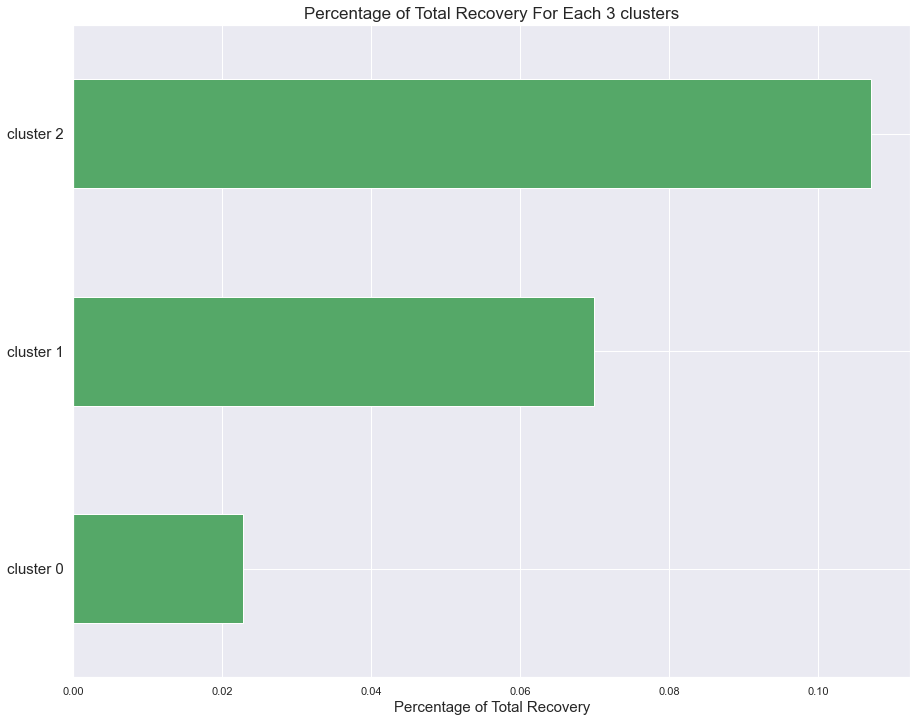

In [410]:
# plot a barchart to show percentage of total recovery for each 3 cluster

vac_rec.groupby('clusters')['pct_rec'].mean().plot(kind='barh', color='g');
plt.ylabel('', fontsize=15);
plt.xlabel('Percentage of Total Recovery', fontsize=15);
x = ['cluster 0','cluster 1','cluster 2']
x_pos = [i for i, _ in enumerate(x)]
plt.yticks(x_pos, x, fontsize = 15);
plt.title('Percentage of Total Recovery For Each 3 clusters', fontsize=17);

## Chart out the vaccination vs confirmed rates in 3 clusters

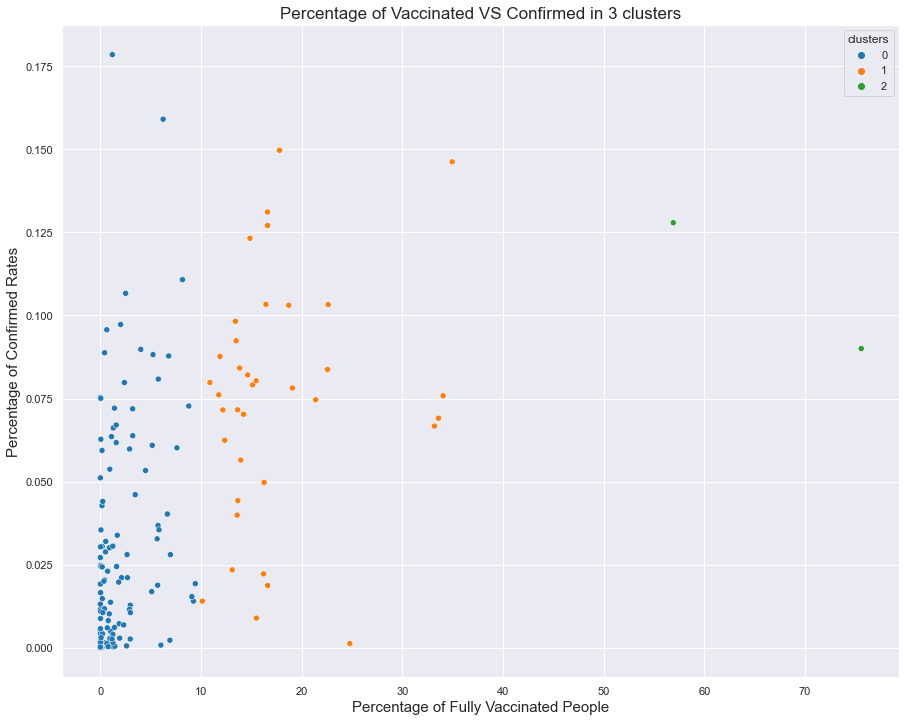

In [411]:
# chart out the clusters for vaccination vs confirmed rates

sns.scatterplot(data=vac_confirmed, x='pct_vac', y='pct_confirmed', hue='clusters', palette='tab10');
plt.xlabel('Percentage of Fully Vaccinated People', fontsize=15);
plt.ylabel('Percentage of Confirmed Rates', fontsize=15);
plt.title('Percentage of Vaccinated VS Confirmed in 3 clusters', fontsize=17);


## Hypothesis testing No.3

### Null Hypotheses, there is no difference between the 3 clusters on vaccination impact on confirmed rates. 
### Alternative Hypothese: there is a significant difference between the 3 clusters on confirmed rates


In [412]:
# categorize confirmed rates according to the 3 clusters

vac_confirmed_grp0 = vac_confirmed.loc[vac_confirmed.clusters==0,'pct_confirmed']
vac_confirmed_grp1 = vac_confirmed.loc[vac_confirmed.clusters==1,'pct_confirmed']
vac_confirmed_grp2 = vac_confirmed.loc[vac_confirmed.clusters==2,'pct_confirmed']

f_oneway(vac_confirmed_grp0, vac_confirmed_grp1, vac_confirmed_grp2)

F_onewayResult(statistic=36.71109224339397, pvalue=3.934030358300576e-14)

### since p_value < 0.05, we reject null hypothesis
### The verdict :  There is a significant difference between the 3 clusters on confirmed rates

In [413]:
vac_confirmed_grp0.mean(),vac_confirmed_grp1.mean(),vac_confirmed_grp2.mean()

(0.02501108000963959, 0.07432185444848224, 0.10896975155974994)

In [414]:
print(f" The average confirmed rates for the least vaccinated countries is {round(vac_confirmed_grp0.mean()*100,2)}%")
print(f" The average confirmed rates for the 2nd most vaccinated countries is {round(vac_confirmed_grp1.mean()*100,2)}%")
print(f" The average confirmed rates for the most vaccinated countries is {round(vac_confirmed_grp2.mean()*100,2)}%")

 The average confirmed rates for the least vaccinated countries is 2.5%
 The average confirmed rates for the 2nd most vaccinated countries is 7.43%
 The average confirmed rates for the most vaccinated countries is 10.9%


## Chart out the tests vs death rates in 3 clusters

In [468]:
tests_death.clusters.value_counts()

0    142
2     36
1      8
Name: clusters, dtype: int64

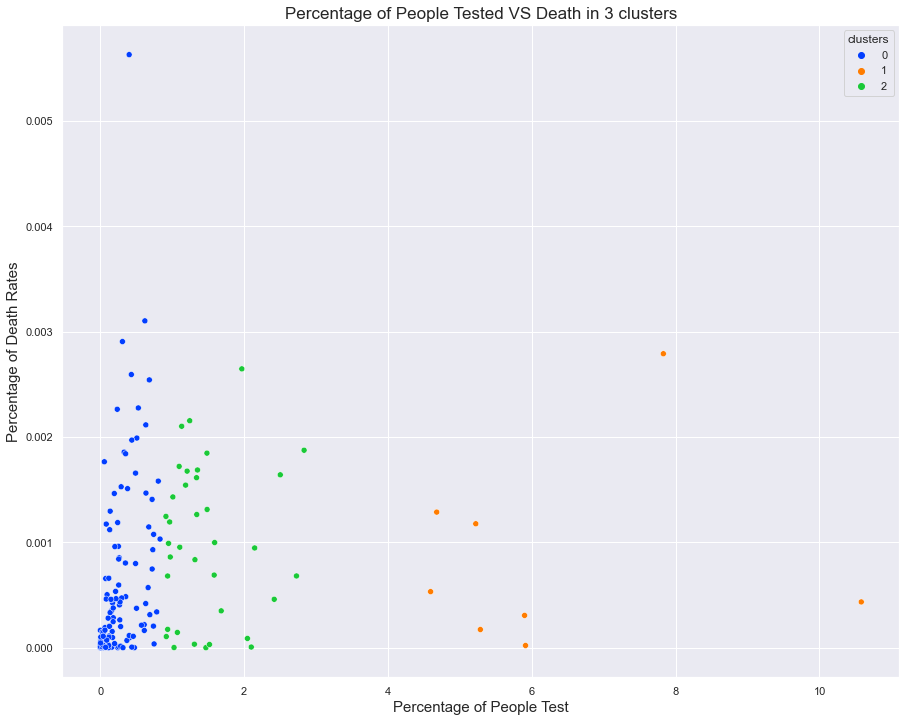

In [437]:
# chart out the clusters for tests vs death rates

sns.scatterplot(data=tests_death, x='pct_tests', y='pct_death', hue='clusters', palette='bright');
plt.xlabel('Percentage of People Test', fontsize=15);
plt.ylabel('Percentage of Death Rates', fontsize=15);
plt.title('Percentage of People Tested VS Death in 3 clusters', fontsize=17);


## Hypothesis testing No.4

### Due to outliers in these 3 clusters ie. cluster 2, we will perform a 2 sampled T test to determine whether there significant difference in deaths given that cluster 1 has higher percentage of people tested for covid-19.

### Null Hypotheses, there is no difference between clusters 0 & 1 on tests and death rates. 
### Alternative Hypothese: there is a significant difference between clusters 0 & 1 on tests and death rates.


In [445]:
# categorize death rates according to the 3 clusters

tests_death_grp0 = tests_death.loc[tests_death.clusters==0,'pct_death']
tests_death_grp1 = tests_death.loc[tests_death.clusters==1,'pct_death']
tests_death_grp2 = tests_death.loc[tests_death.clusters==2,'pct_death']


In [441]:
# 2 sample t test between cluster 0 and cluster 1

stats.ttest_ind(tests_death_grp0,tests_death_grp1)

Ttest_indResult(statistic=-1.0546752852263386, pvalue=0.2932925591454877)

### since p_value > 0.05, we fail to reject null hypothesis
### The verdict :  There is no a significant difference between cluster 0 & 1 on tests and death rates.

In [458]:
print(f" The average death rates for the least tested countries is {round(tests_death_grp0.mean()*100,2)}%")
print(f" The average death rates for the 2nd most tested countries is {round(tests_death_grp1.mean()*100,2)}%")
print(f" The average death rates for the most tested countries is {round(tests_death_grp2.mean()*100,2)}%")

 The average death rates for the least tested countries is 0.05%
 The average death rates for the 2nd most tested countries is 0.08%
 The average death rates for the most tested countries is 0.1%


## Chart out the tests vs confirmed rates in 3 clusters

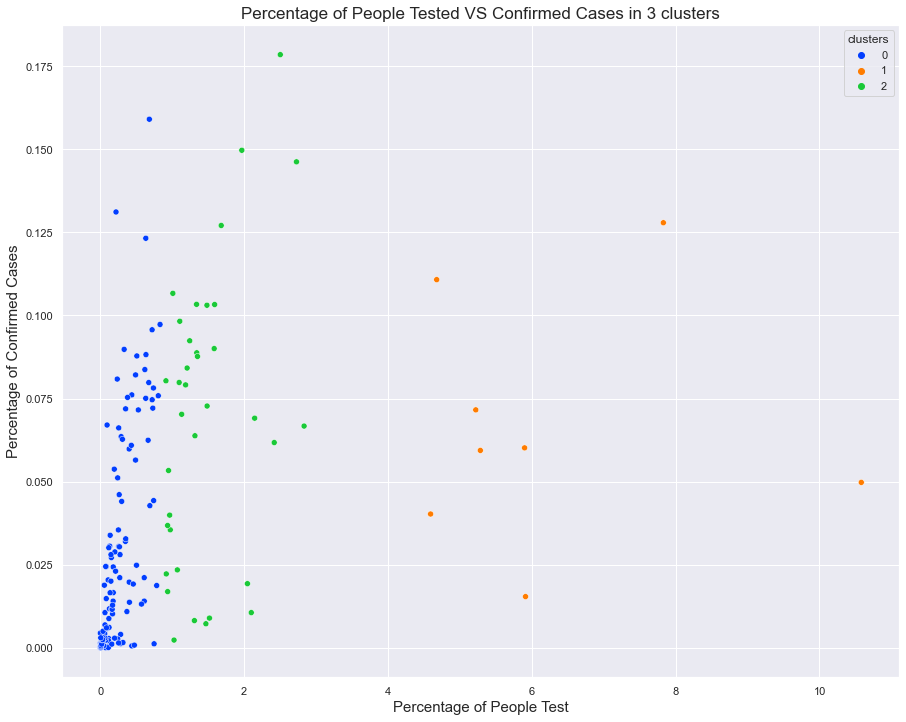

In [467]:
# chart out the clusters for tests vs confirmed rates

tests_confirmed.sort_values('clusters',ascending=True, inplace=True)
sns.scatterplot(data=tests_confirmed, x='pct_tests', y='pct_confirmed', hue='clusters', palette='bright');
plt.xlabel('Percentage of People Test', fontsize=15);
plt.ylabel('Percentage of Confirmed Cases', fontsize=15);
plt.title('Percentage of People Tested VS Confirmed Cases in 3 clusters', fontsize=17);

In [463]:
# categorize percentage of confirmed cases according to the 3 clusters

tests_confirmed_grp0 = tests_confirmed.loc[tests_confirmed.clusters==0,'pct_confirmed']
tests_confirmed_grp1 = tests_confirmed.loc[tests_confirmed.clusters==1,'pct_confirmed']
tests_confirmed_grp2 = tests_confirmed.loc[tests_confirmed.clusters==2,'pct_confirmed']

f_oneway(tests_confirmed_grp0,tests_confirmed_grp1,tests_confirmed_grp2)

F_onewayResult(statistic=25.34191004203735, pvalue=1.9264326342509367e-10)

In [464]:
stats.ttest_ind(tests_confirmed_grp0,tests_confirmed_grp2)

Ttest_indResult(statistic=-6.653742186082651, pvalue=3.486687826917222e-10)

In [465]:
print(f" The average % of confirmed cases for the least tested countries is {round(tests_confirmed_grp0.mean()*100,2)}%")
print(f" The average % of confirmed cases for the 2nd most tested countries is {round(tests_confirmed_grp1.mean()*100,2)}%")
print(f" The average % of confirmed cases for the most tested countries is {round(tests_confirmed_grp2.mean()*100,2)}%")

 The average % of confirmed cases for the least tested countries is 2.55%
 The average % of confirmed cases for the 2nd most tested countries is 6.69%
 The average % of confirmed cases for the most tested countries is 6.91%


In [459]:
tests_confirmed

,pct_confirmed,pct_tests,clusters
0,0.002236,0.013081,0
1,0.046068,0.261764,0
2,0.002976,0.005177,0
3,0.178504,2.501809,2
4,0.001078,0.017634,0
5,0.007205,1.467447,2
6,0.012797,0.169212,0
7,0.089787,0.330525,0
8,0.075339,0.378071,0
9,0.103289,1.588876,2


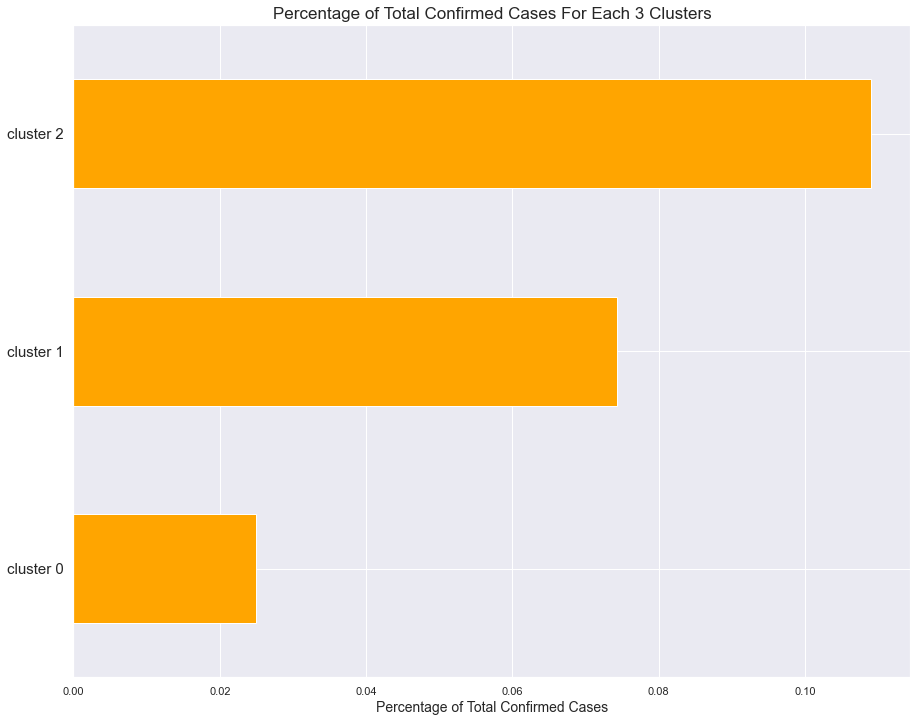

In [415]:
# plot bar chat to show percentage of total confirmed cases for each 3 cluster

vac_confirmed.groupby('clusters')['pct_confirmed'].mean().plot(kind='barh', color='orange');
plt.ylabel('', fontsize=15);
plt.xlabel('Percentage of Total Confirmed Cases', fontsize=14);
x = ['cluster 0','cluster 1','cluster 2']
x_pos = [i for i, _ in enumerate(x)]
plt.yticks(x_pos, x, fontsize = 15);
plt.title('Percentage of Total Confirmed Cases For Each 3 Clusters', fontsize=17);

In [457]:
pct_death_vac

,country,continent,pct_tests,pct_vac,pct_confirmed,pct_rec,pct_death,total_deaths
0,Afghanistan,Asia,0.013081,0.0357,0.002236,0.001524,8.704091e-05,3460.0
1,Albania,Europe,0.261764,3.4607,0.046068,0.045153,8.532684e-04,2453.0
2,Algeria,Africa,0.005177,0.0000,0.002976,0.002072,7.982874e-05,3560.0
3,Andorra,Europe,2.501809,1.1898,0.178504,0.175635,1.641209e-03,127.0
4,Angola,Africa,0.017634,0.0919,0.001078,0.000890,2.421394e-05,819.0
5,Anguilla,North America,1.467447,1.8659,0.007205,0.007205,0.000000e+00,0.0
6,Antigua And Barbuda,North America,0.169212,2.9685,0.012797,0.012301,4.255621e-04,42.0
7,Argentina,South America,0.330525,4.0158,0.089787,0.080477,1.856419e-03,84628.0
8,Armenia,Asia,0.378071,0.0000,0.075339,0.072468,1.509867e-03,4482.0
9,Aruba,North America,1.588876,22.6346,0.103289,0.102151,9.981902e-04,107.0


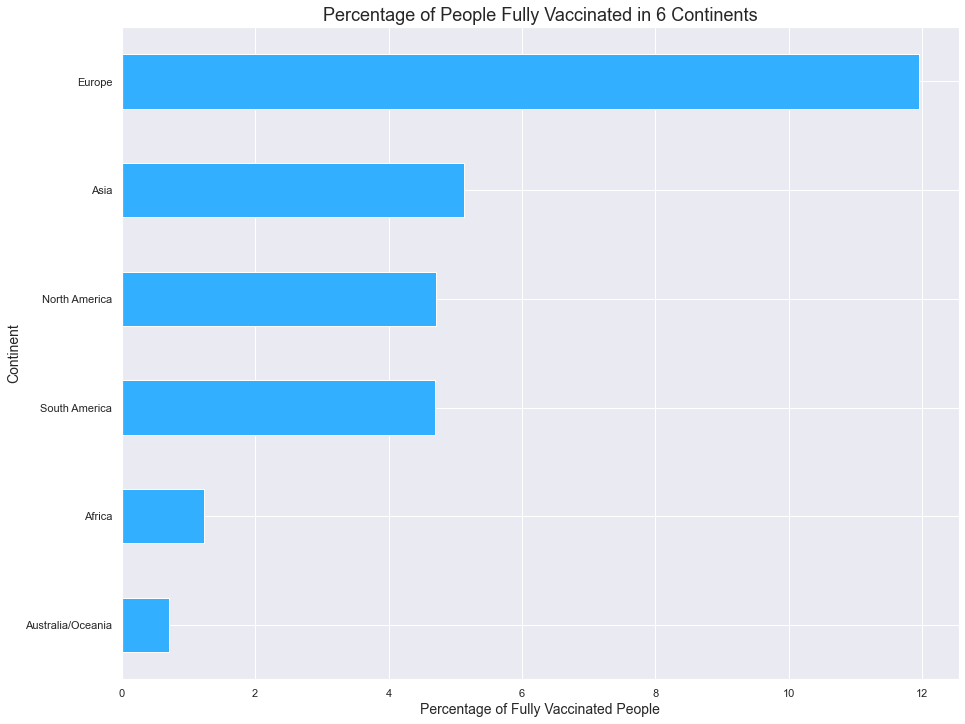

In [417]:
# plot bar chart to show the percentage of people fully vaccinated in all 6 continents

pct_death_vac.groupby('continent')['pct_vac'].mean().sort_values().plot(kind='barh', color='#33AFFF');
plt.ylabel('Continent', fontsize=14);
plt.xlabel('Percentage of Fully Vaccinated People', fontsize=14);
plt.title('Percentage of People Fully Vaccinated in 6 Continents', fontsize=18);

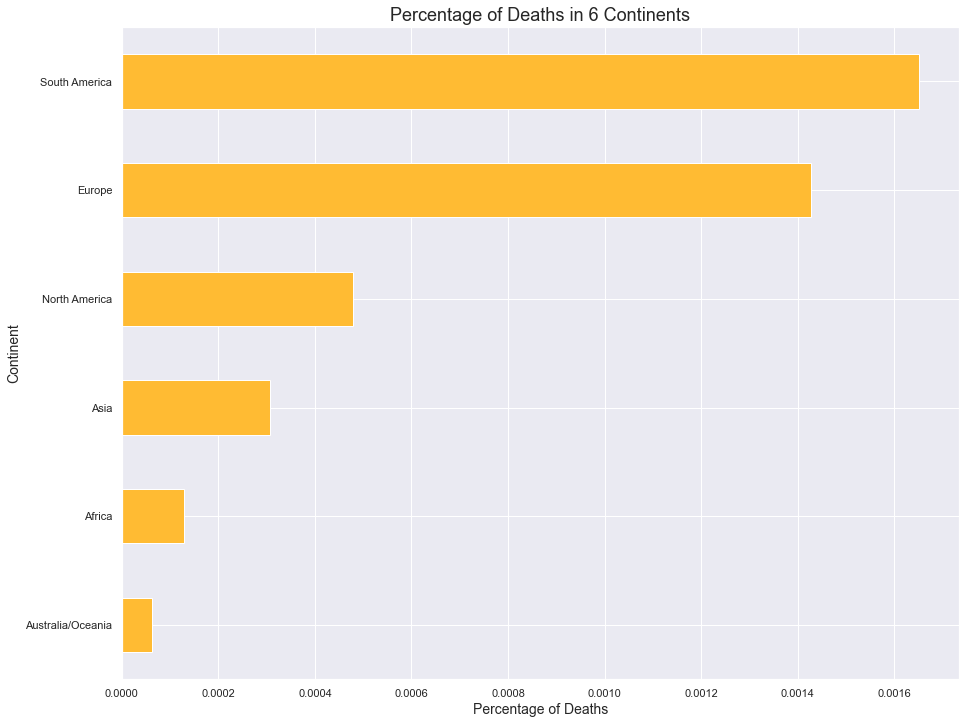

In [418]:
# plot bar chart to show the percentage of death rates in all 6 continents

pct_death_vac.groupby('continent')['pct_death'].mean().sort_values().plot(kind='barh', color='#FFBB33');
plt.ylabel('Continent', fontsize=14);
plt.xlabel('Percentage of Deaths', fontsize=14);
plt.title('Percentage of Deaths in 6 Continents', fontsize=18);

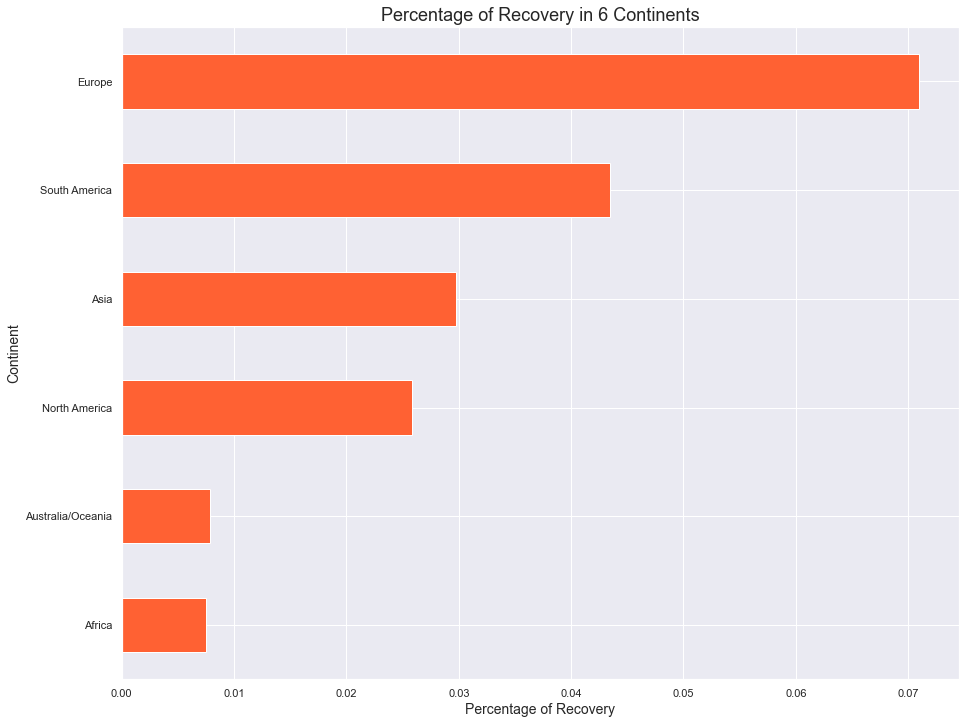

In [419]:
# plot bar chart to show the percentage of recovery rates in all 6 continents

pct_death_vac.groupby('continent')['pct_rec'].mean().sort_values().plot(kind='barh', color='#FF6133');
plt.ylabel('Continent', fontsize=14);
plt.xlabel('Percentage of Recovery', fontsize=14);
plt.title('Percentage of Recovery in 6 Continents', fontsize=18);

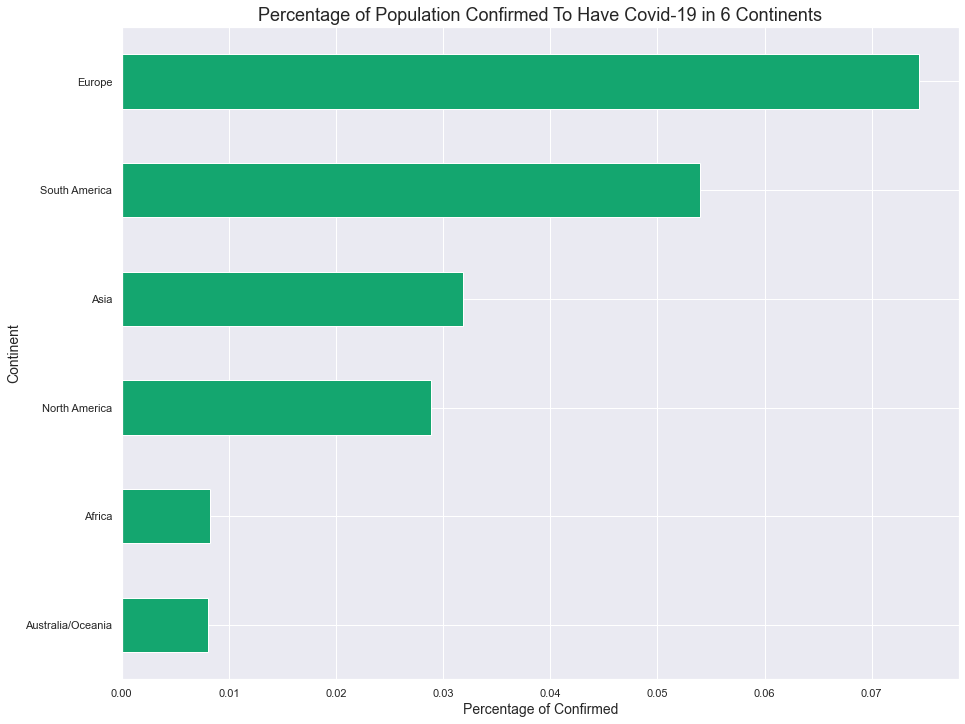

In [420]:
# plot bar chart to show the percentage of confirmed rates in all 6 continents

pct_death_vac.groupby('continent')['pct_confirmed'].mean().sort_values().plot(kind='barh', color='#14A66F');
plt.ylabel('Continent', fontsize=14);
plt.xlabel('Percentage of Confirmed', fontsize=14);
plt.title('Percentage of Population Confirmed To Have Covid-19 in 6 Continents', fontsize=18);

In [421]:
pct_death_vac.head()

,country,continent,pct_tests,pct_vac,pct_confirmed,pct_rec,pct_death,total_deaths
0,Afghanistan,Asia,0.013081,0.0357,0.002236,0.001524,0.000087,3460.0
1,Albania,Europe,0.261764,3.4607,0.046068,0.045153,0.000853,2453.0
2,Algeria,Africa,0.005177,0.0000,0.002976,0.002072,0.000080,3560.0
3,Andorra,Europe,2.501809,1.1898,0.178504,0.175635,0.001641,127.0
4,Angola,Africa,0.017634,0.0919,0.001078,0.000890,0.000024,819.0


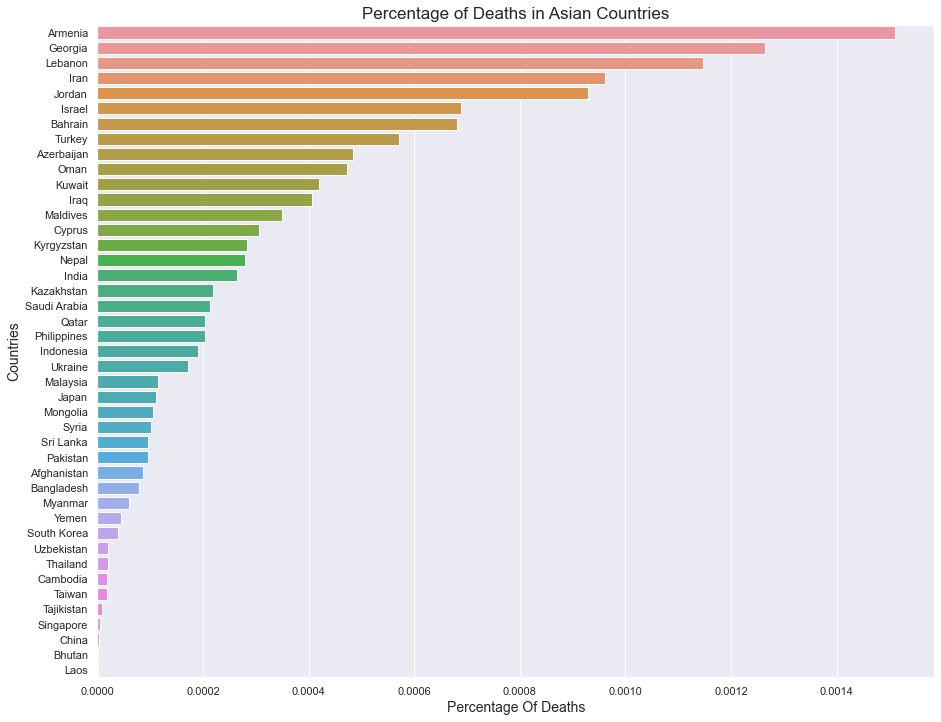

In [422]:
# plot a bar chart to show percentage of death in Asian countries

pct_death_vac_death = pct_death_vac.loc[pct_death_vac.continent=='Asia', ['country','pct_death']].\
sort_values('pct_death', ascending=False)

sns.barplot(data=pct_death_vac_death, x='pct_death', y='country');
plt.xlabel('Percentage Of Deaths', fontsize=14);
plt.ylabel('Countries', fontsize=14);
plt.title('Percentage of Deaths in Asian Countries', fontsize=17);

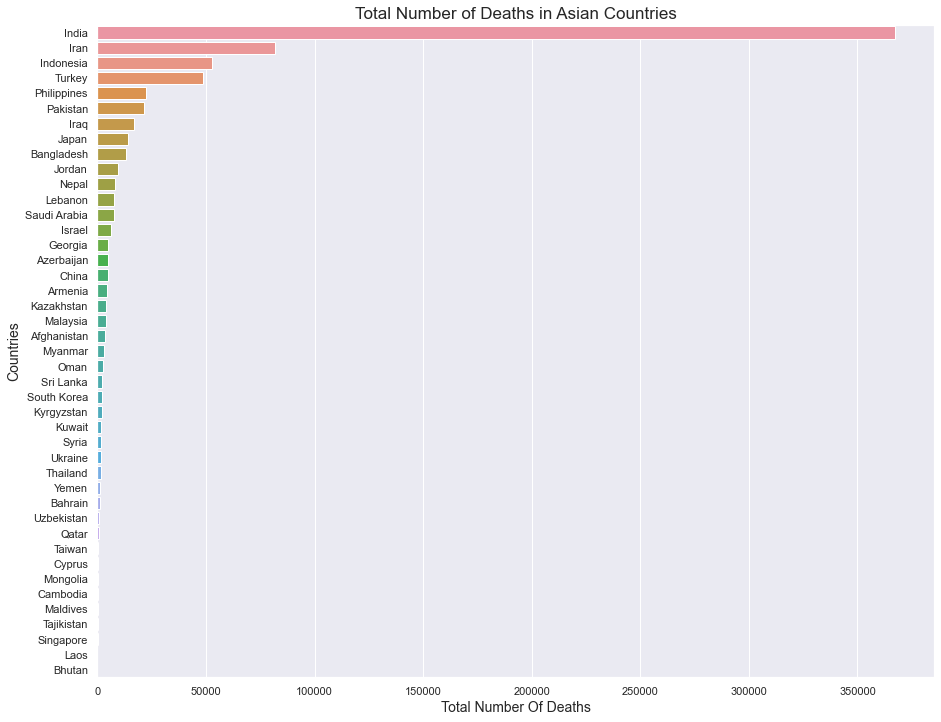

In [423]:
# plot a bar chart to show total number of deaths in Asian countries

pct_death_vac_death = pct_death_vac.loc[pct_death_vac.continent=='Asia', ['country','total_deaths']].\
sort_values('total_deaths', ascending=False)

sns.barplot(data=pct_death_vac_death, x='total_deaths', y='country');
plt.xlabel('Total Number Of Deaths', fontsize=14);
plt.ylabel('Countries', fontsize=14);
plt.title('Total Number of Deaths in Asian Countries', fontsize=17);

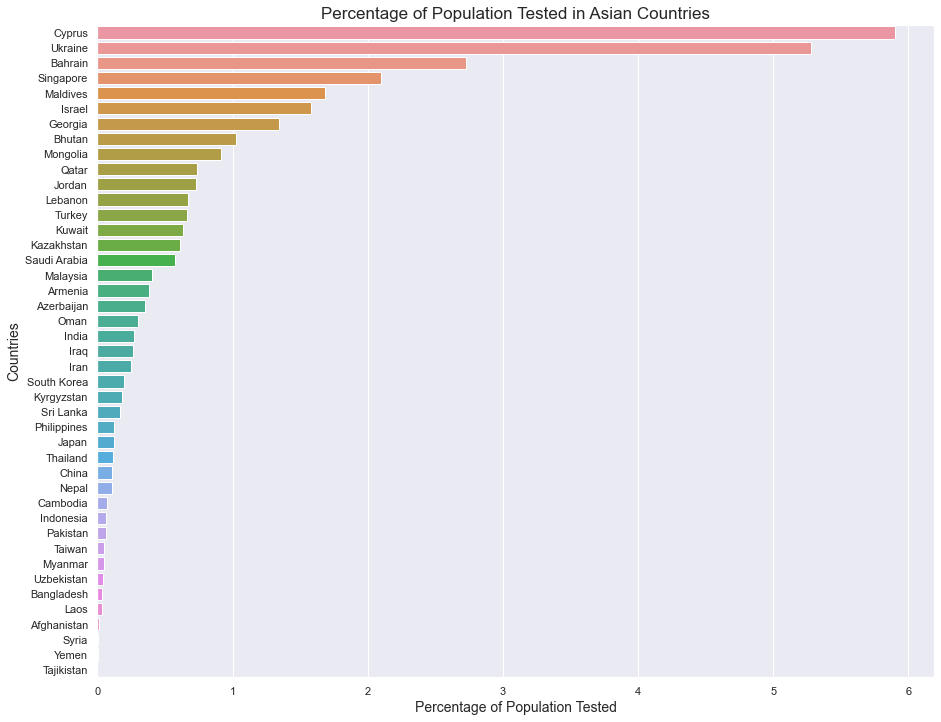

In [447]:
# plot a bar chart to show percentage of tests in Asian countries

pct_death_vac_death = pct_death_vac.loc[pct_death_vac.continent=='Asia', ['country','pct_tests']].\
sort_values('pct_tests', ascending=False)

sns.barplot(data=pct_death_vac_death, x='pct_tests', y='country');
plt.xlabel('Percentage of Population Tested', fontsize=14);
plt.ylabel('Countries', fontsize=14);
plt.title('Percentage of Population Tested in Asian Countries', fontsize=17);